In [2]:
pip install seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set plot style using seaborn
sns.set_theme(style='darkgrid')
sns.set_palette('deep')

# Load the data
df = pd.read_excel("/content/Matiks - Data Analyst Data.xlsx")  # Use read_excel for .xlsx files


df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], format='%d-%b-%Y', errors='coerce')
df['Last_Login'] = pd.to_datetime(df['Last_Login'], format='%d-%b-%Y', errors='coerce')


df['Total_Hours_Played'] = df['Total_Hours_Played'].apply(lambda x: max(x, 0))
df['Avg_Session_Duration_Min'] = df['Avg_Session_Duration_Min'].apply(lambda x: max(x, 0))


In [5]:

# DAU: Unique users who logged in on each day
dau = df.groupby(df['Last_Login'].dt.date)['User_ID'].nunique().reset_index()
dau.columns = ['Date', 'DAU']

# WAU: Unique users who logged in within each week

df['Week'] = df['Last_Login'].dt.to_period('W').apply(lambda r: r.start_time)
wau = df.groupby('Week')['User_ID'].nunique().reset_index()
wau.columns = ['Week', 'WAU']

# MAU: Unique users who logged in within each month
df['Month'] = df['Last_Login'].dt.to_period('M').apply(lambda r: r.start_time)
mau = df.groupby('Month')['User_ID'].nunique().reset_index()
mau.columns = ['Month', 'MAU']

# Step 4: Revenue Trends

df['Signup_Month'] = df['Signup_Date'].dt.to_period('M').apply(lambda r: r.start_time)
revenue_trend = df.groupby('Signup_Month')['Total_Revenue_USD'].sum().reset_index()


In [6]:
# Step 5: Breakdowns
# By Device Type
device_breakdown = df.groupby('Device_Type').agg({
    'User_ID': 'nunique',
    'Total_Revenue_USD': 'sum',
    'Total_Hours_Played': 'mean'
}).reset_index()
device_breakdown.columns = ['Device_Type', 'Unique_Users', 'Total_Revenue', 'Avg_Hours_Played']

# By Subscription Tier (User Segment)
segment_breakdown = df.groupby('Subscription_Tier').agg({
    'User_ID': 'nunique',
    'Total_Revenue_USD': 'sum',
    'Total_Hours_Played': 'mean'
}).reset_index()
segment_breakdown.columns = ['Subscription_Tier', 'Unique_Users', 'Total_Revenue', 'Avg_Hours_Played']

# By Preferred Game Mode
game_mode_breakdown = df.groupby('Preferred_Game_Mode').agg({
    'User_ID': 'nunique',
    'Total_Revenue_USD': 'sum',
    'Total_Hours_Played': 'mean'
}).reset_index()
game_mode_breakdown.columns = ['Game_Mode', 'Unique_Users', 'Total_Revenue', 'Avg_Hours_Played']

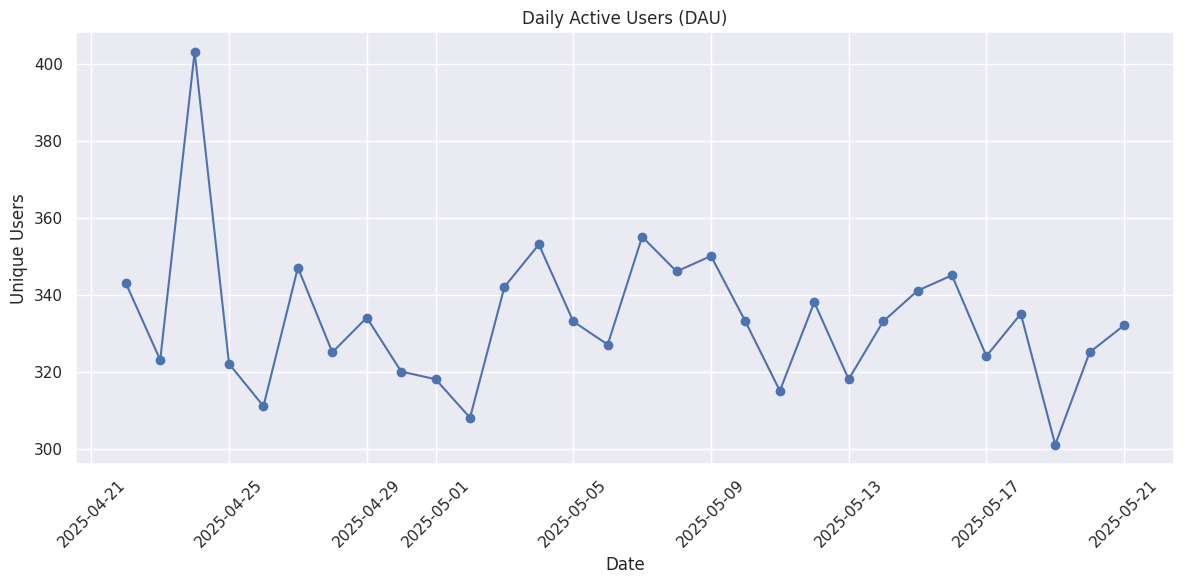

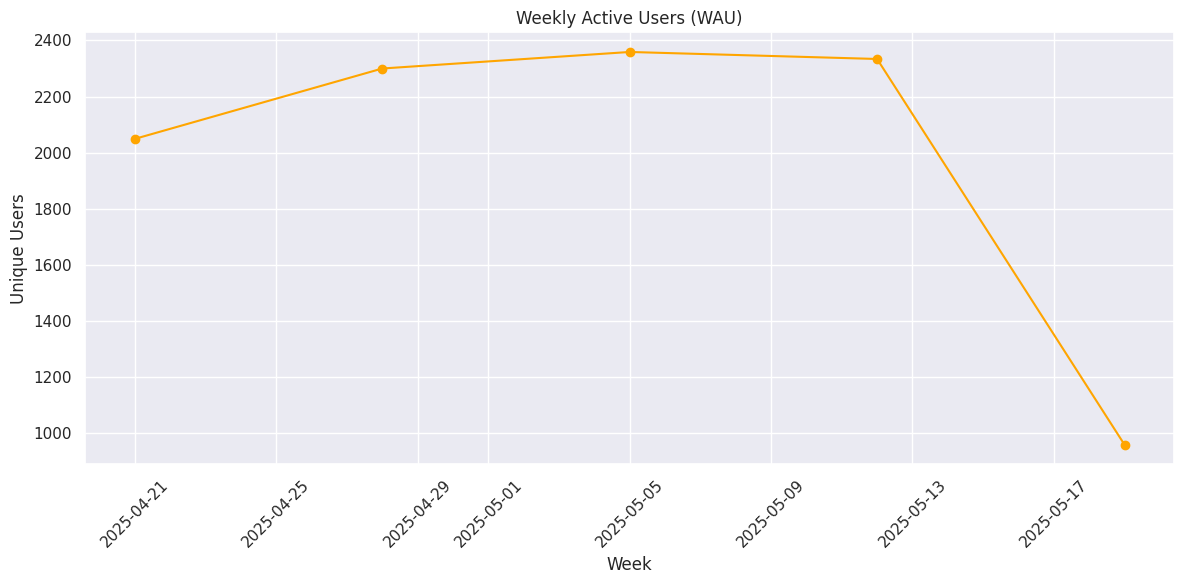

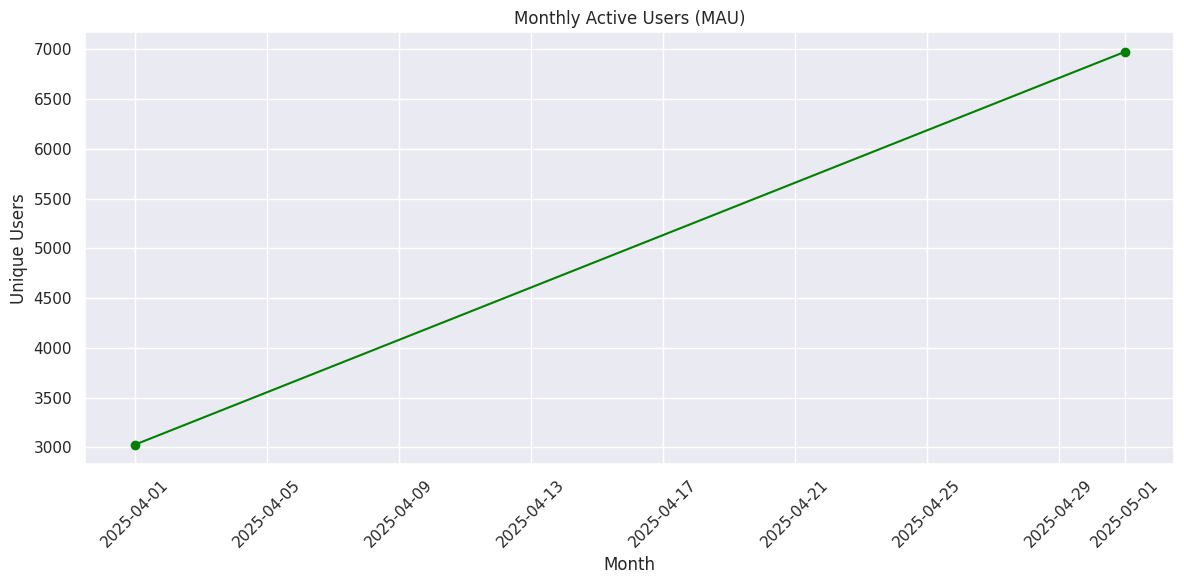

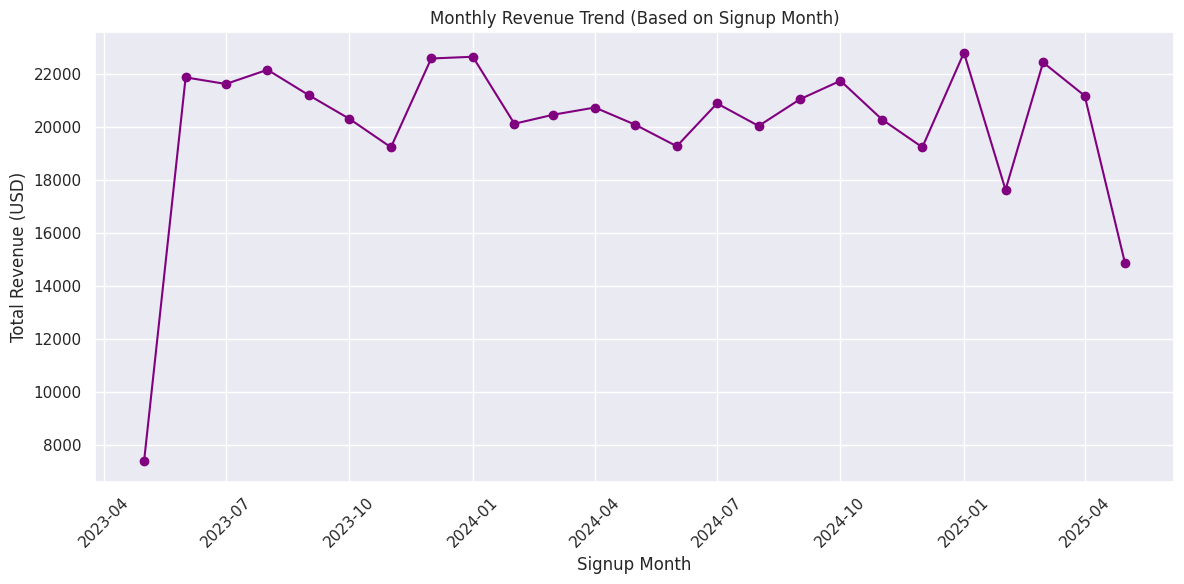

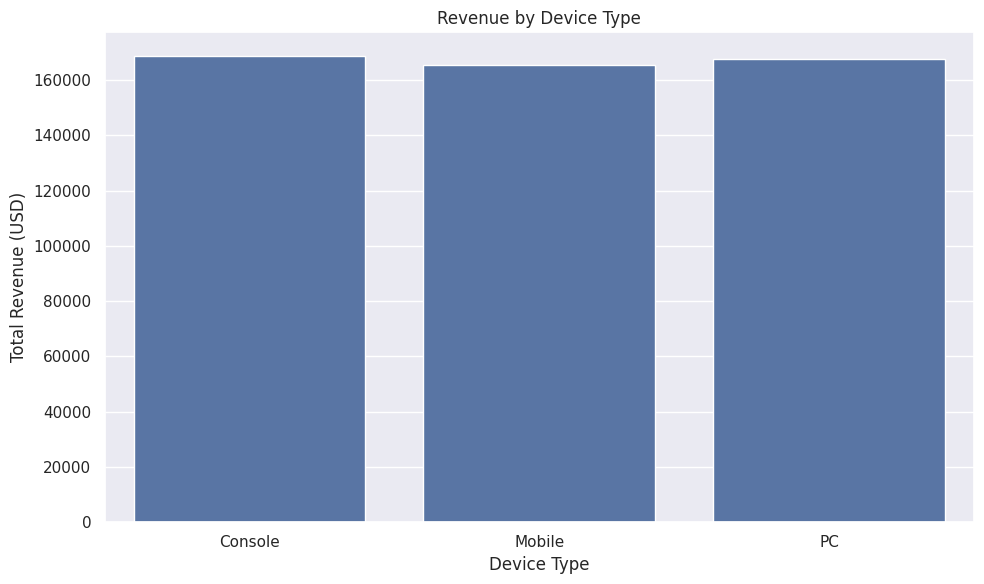

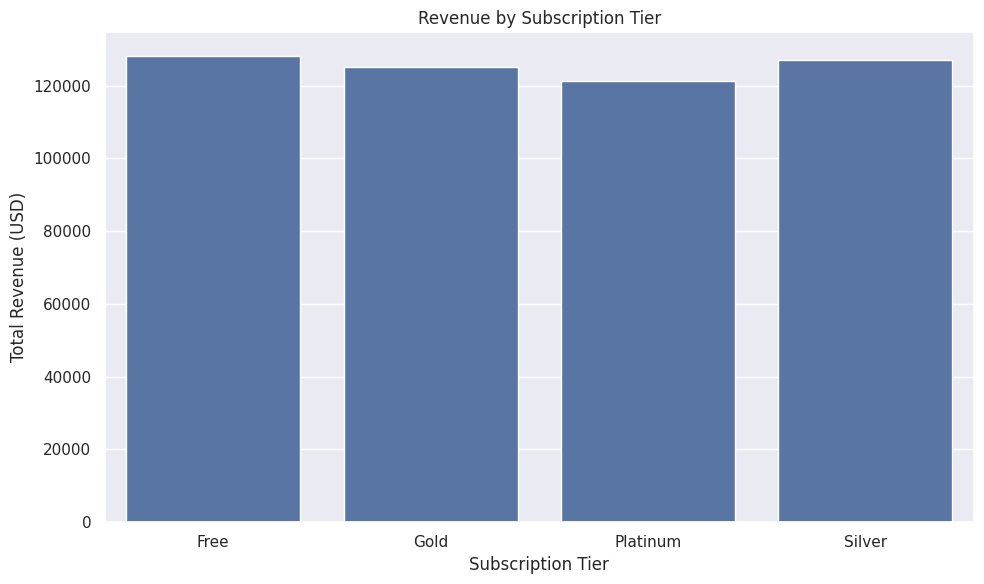

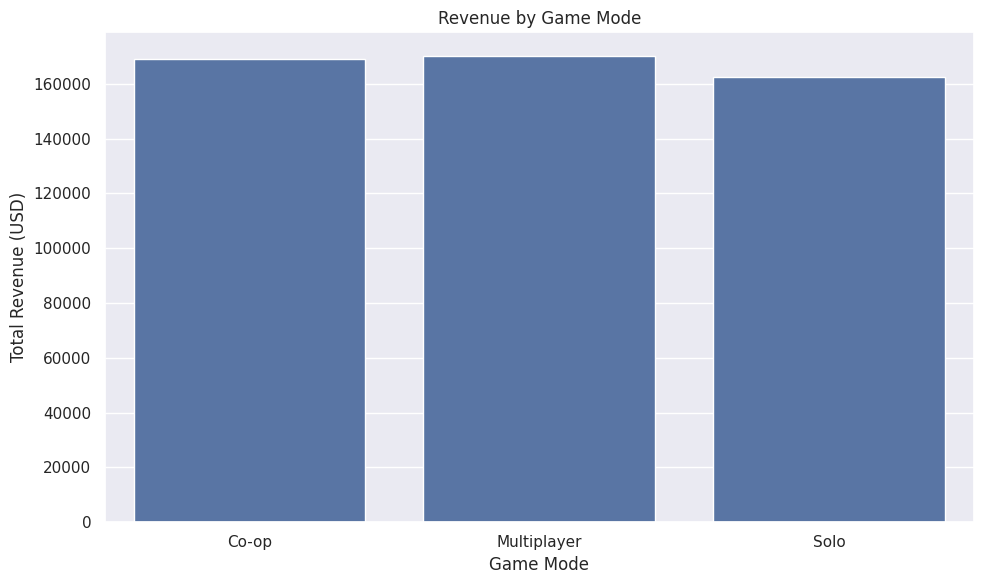

DAU Summary:
          Date  DAU
25  2025-05-17  324
26  2025-05-18  335
27  2025-05-19  301
28  2025-05-20  325
29  2025-05-21  332

WAU Summary:
        Week   WAU
0 2025-04-21  2049
1 2025-04-28  2300
2 2025-05-05  2359
3 2025-05-12  2334
4 2025-05-19   958

MAU Summary:
       Month   MAU
0 2025-04-01  3028
1 2025-05-01  6972

Revenue Trend (by Signup Month):
   Signup_Month  Total_Revenue_USD
20   2025-01-01           22799.59
21   2025-02-01           17625.43
22   2025-03-01           22434.46
23   2025-04-01           21175.48
24   2025-05-01           14862.92

Device Type Breakdown:
  Device_Type  Unique_Users  Total_Revenue  Avg_Hours_Played
0     Console          3395      168884.50        100.750881
1      Mobile          3301      165350.09         99.574483
2          PC          3304      167540.07        101.411752

Subscription Tier Breakdown:
  Subscription_Tier  Unique_Users  Total_Revenue  Avg_Hours_Played
0              Free          2536      128255.21        102

In [9]:
# Step 6: Visualizations

# Plot DAU
plt.figure(figsize=(12, 6))
plt.plot(dau['Date'], dau['DAU'], marker='o')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Unique Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

# Plot WAU
plt.figure(figsize=(12, 6))
plt.plot(wau['Week'], wau['WAU'], marker='o', color='orange')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Unique Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

# Plot MAU
plt.figure(figsize=(12, 6))
plt.plot(mau['Month'], mau['MAU'], marker='o', color='green')
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Unique Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

# Plot Revenue Trend
plt.figure(figsize=(12, 6))
plt.plot(revenue_trend['Signup_Month'], revenue_trend['Total_Revenue_USD'], marker='o', color='purple')
plt.title('Monthly Revenue Trend (Based on Signup Month)')
plt.xlabel('Signup Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

# Plot Device Type Breakdown
plt.figure(figsize=(10, 6))
sns.barplot(data=device_breakdown, x='Device_Type', y='Total_Revenue')
plt.title('Revenue by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()
plt.close()

# Plot Subscription Tier Breakdown
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_breakdown, x='Subscription_Tier', y='Total_Revenue')
plt.title('Revenue by Subscription Tier')
plt.xlabel('Subscription Tier')
plt.ylabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()
plt.close()

# Plot Game Mode Breakdown
plt.figure(figsize=(10, 6))
sns.barplot(data=game_mode_breakdown, x='Game_Mode', y='Total_Revenue')
plt.title('Revenue by Game Mode')
plt.xlabel('Game Mode')
plt.ylabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()
plt.close()

# Step 7: Print KPI Summaries
print("DAU Summary:")
print(dau.tail())

print("\nWAU Summary:")
print(wau.tail())

print("\nMAU Summary:")
print(mau.tail())

print("\nRevenue Trend (by Signup Month):")
print(revenue_trend.tail())

print("\nDevice Type Breakdown:")
print(device_breakdown)

print("\nSubscription Tier Breakdown:")
print(segment_breakdown)

print("\nGame Mode Breakdown:")
print(game_mode_breakdown)


In [10]:
import pandas as pd
from datetime import timedelta

# Load the dataset (same as before)
sheet_id = "1NyFJYCi5wF8QD0FIfxlyvYKksnnbKExzXOjioE_1hWA"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"
df = pd.read_csv(url)

# Convert dates
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], format='%d-%b-%Y', errors='coerce')
df['Last_Login'] = pd.to_datetime(df['Last_Login'], format='%d-%b-%Y', errors='coerce')

# 1. Retention Rate (Day 7)
df['Day7_Login'] = df['Last_Login'] <= df['Signup_Date'] + timedelta(days=7)
retention_day7 = df.groupby(df['Signup_Date'].dt.to_period('M'))['Day7_Login'].mean().reset_index()
retention_day7.columns = ['Signup_Month', 'Day7_Retention_Rate']
retention_day7['Day7_Retention_Rate'] *= 100  # Convert to percentage

# 2. ARPU
arpu = df['Total_Revenue_USD'].sum() / df['User_ID'].nunique()
arpu_by_segment = df.groupby('Subscription_Tier')['Total_Revenue_USD'].sum() / df.groupby('Subscription_Tier')['User_ID'].nunique()
arpu_by_segment = arpu_by_segment.reset_index()
arpu_by_segment.columns = ['Subscription_Tier', 'ARPU']

# 3. Purchase Conversion Rate
paying_users = df[df['In_Game_Purchases_Count'] > 0]['User_ID'].nunique()
total_users = df['User_ID'].nunique()
purchase_conversion = (paying_users / total_users) * 100
purchase_conversion_by_source = df[df['In_Game_Purchases_Count'] > 0].groupby('Referral_Source')['User_ID'].nunique() / df.groupby('Referral_Source')['User_ID'].nunique() * 100
purchase_conversion_by_source = purchase_conversion_by_source.reset_index()
purchase_conversion_by_source.columns = ['Referral_Source', 'Purchase_Conversion_Rate']

# Print results
print("Day 7 Retention Rate by Signup Month:")
print(retention_day7.tail())
print("\nOverall ARPU:", f"${arpu:.2f}")
print("\nARPU by Subscription Tier:")
print(arpu_by_segment)
print("\nOverall Purchase Conversion Rate:", f"{purchase_conversion:.2f}%")
print("\nPurchase Conversion Rate by Referral Source:")
print(purchase_conversion_by_source)

Day 7 Retention Rate by Signup Month:
   Signup_Month  Day7_Retention_Rate
20      2025-01             0.000000
21      2025-02             0.000000
22      2025-03             0.000000
23      2025-04            16.627078
24      2025-05            82.993197

Overall ARPU: $50.18

ARPU by Subscription Tier:
  Subscription_Tier       ARPU
0              Free  50.573821
1              Gold  49.361995
2          Platinum  50.366858
3            Silver  50.418228

Overall Purchase Conversion Rate: 99.40%

Purchase Conversion Rate by Referral Source:
  Referral_Source  Purchase_Conversion_Rate
0             Ads                 99.317269
1          Friend                 99.396135
2         Organic                 99.183197
3    Social Media                 99.714868


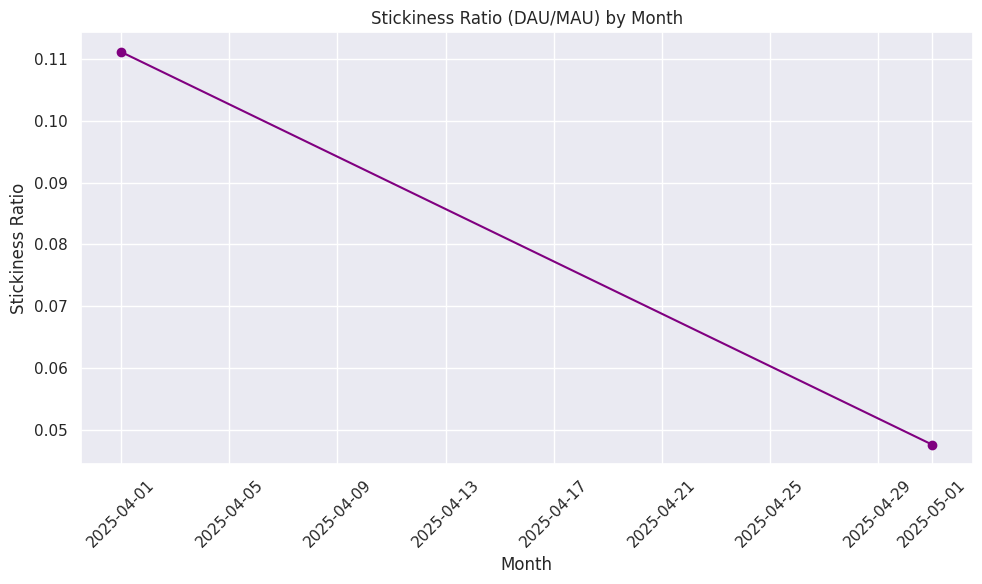

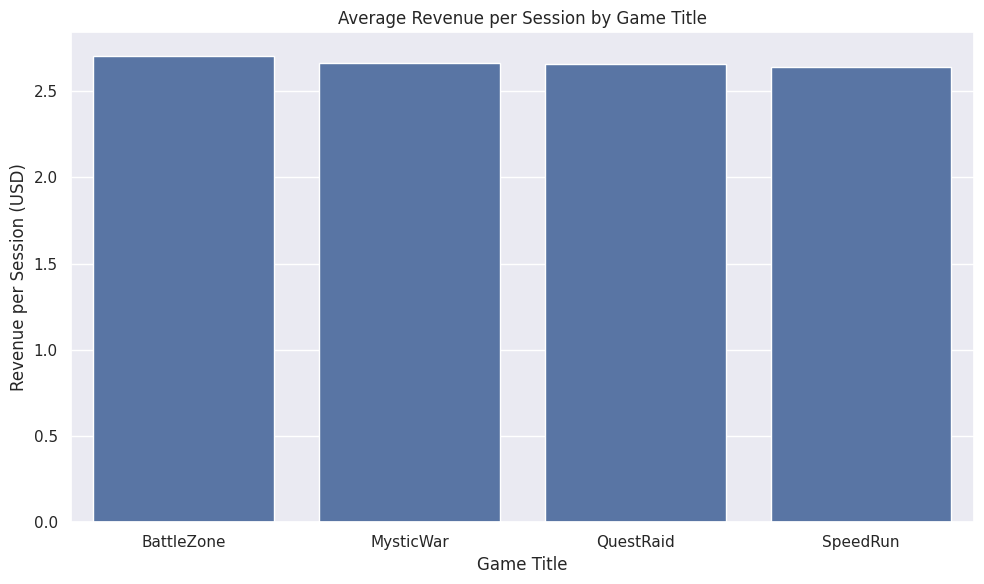

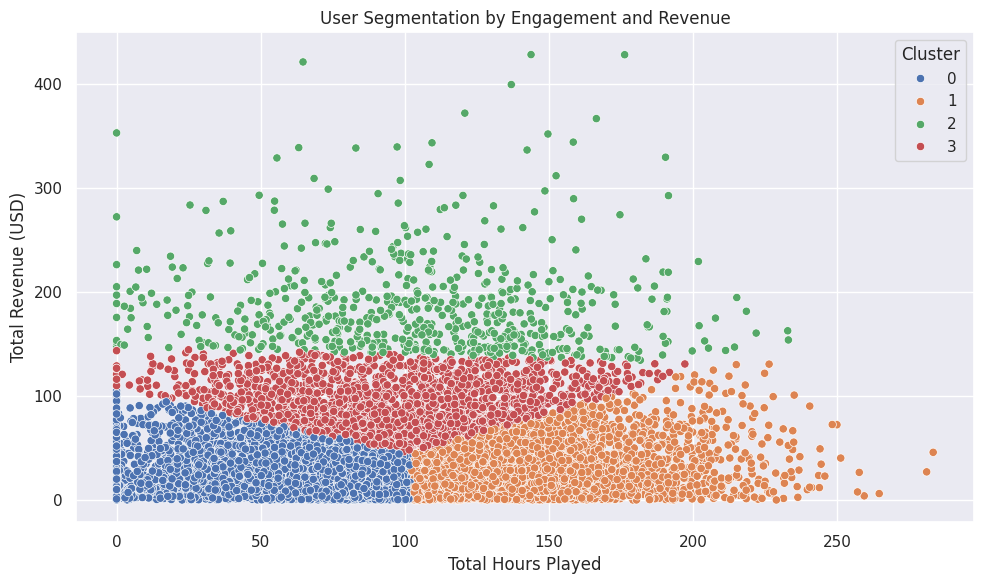

Stickiness Ratio (DAU/MAU):
       Month  Stickiness_Ratio
0 2025-04-01          0.111111
1 2025-05-01          0.047619

Revenue per Session by Game Title:
   Game_Title  Revenue_Per_Session
0  BattleZone             2.705735
1   MysticWar             2.661705
2   QuestRaid             2.659931
3    SpeedRun             2.641458

Rank Tier Advancement Rate (Gold or higher): 60.18%

Cluster Summary:
   Cluster  Avg_Hours_Played  Avg_Revenue  User_Count Common_Subscription_Tier
0        0         59.115275    27.098451        3744                     Gold
1        1        144.741626    28.614642        3684                     Free
2        2        103.477419   188.366948         616                   Silver
3        3         95.864627    91.445644        1956                     Gold


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
# Data cleaning
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], format='%d-%b-%Y', errors='coerce')
df['Last_Login'] = pd.to_datetime(df['Last_Login'], format='%d-%b-%Y', errors='coerce')
df['Total_Hours_Played'] = df['Total_Hours_Played'].apply(lambda x: max(x, 0))
df['Avg_Session_Duration_Min'] = df['Avg_Session_Duration_Min'].apply(lambda x: max(x, 0))

# 1. Stickiness Ratio (DAU/MAU)
dau = df.groupby(df['Last_Login'].dt.date)['User_ID'].nunique().reset_index()
dau.columns = ['Date', 'DAU']
df['Month'] = df['Last_Login'].dt.to_period('M').apply(lambda r: r.start_time)
mau = df.groupby('Month')['User_ID'].nunique().reset_index()
mau.columns = ['Month', 'MAU']
avg_dau_per_month = dau.groupby(dau['Date'].apply(lambda x: pd.to_datetime(x).to_period('M').start_time))['DAU'].mean().reset_index()
avg_dau_per_month.columns = ['Month', 'Avg_DAU']
stickiness = avg_dau_per_month.merge(mau, on='Month')
stickiness['Stickiness_Ratio'] = stickiness['Avg_DAU'] / stickiness['MAU']

# 2. Revenue per Session
df['Revenue_Per_Session'] = df['Total_Revenue_USD'] / df['Total_Play_Sessions']
revenue_per_session = df.groupby('Game_Title')['Revenue_Per_Session'].mean().reset_index()

# 3. Rank Tier Advancement Rate
rank_order = {'Bronze': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4, 'Diamond': 5}
df['Rank_Value'] = df['Rank_Tier'].map(rank_order)
high_rank_users = df[df['Rank_Value'] >= 3]['User_ID'].nunique()  # Gold or higher
rank_advancement_rate = (high_rank_users / df['User_ID'].nunique()) * 100

# 4. User Segmentation (Clustering)
# Select features for clustering
features = df[['Total_Hours_Played', 'Total_Revenue_USD']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
# Analyze clusters
cluster_summary = df.groupby('Cluster').agg({
    'Total_Hours_Played': 'mean',
    'Total_Revenue_USD': 'mean',
    'User_ID': 'count',
    'Subscription_Tier': lambda x: x.mode()[0]
}).reset_index()
cluster_summary.columns = ['Cluster', 'Avg_Hours_Played', 'Avg_Revenue', 'User_Count', 'Common_Subscription_Tier']

# Visualizations

# Stickiness Ratio
plt.figure(figsize=(10, 6))
plt.plot(stickiness['Month'], stickiness['Stickiness_Ratio'], marker='o', color='purple')
plt.title('Stickiness Ratio (DAU/MAU) by Month')
plt.xlabel('Month')
plt.ylabel('Stickiness Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

# Revenue per Session by Game Title
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_per_session, x='Game_Title', y='Revenue_Per_Session')
plt.title('Average Revenue per Session by Game Title')
plt.xlabel('Game Title')
plt.ylabel('Revenue per Session (USD)')
plt.tight_layout()
plt.show()
plt.close()

# Cluster Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Hours_Played', y='Total_Revenue_USD', hue='Cluster', palette='deep')
plt.title('User Segmentation by Engagement and Revenue')
plt.xlabel('Total Hours Played')
plt.ylabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()
plt.close()


# Print results
print("Stickiness Ratio (DAU/MAU):")
print(stickiness[['Month', 'Stickiness_Ratio']].tail())
print("\nRevenue per Session by Game Title:")
print(revenue_per_session)
print("\nRank Tier Advancement Rate (Gold or higher):", f"{rank_advancement_rate:.2f}%")
print("\nCluster Summary:")
print(cluster_summary)

In [15]:
!sudo tar -xvzf /content/ngrok-v3-stable-linux-amd64.tgz

ngrok


In [18]:
!/content/ngrok authtoken 2b2dbgzgUwpEFc6LV0p39tU1zJR_3sMRYo8mQp3KCYbxNYMh


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [20]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [22]:
# Save cleaned dataset for further analysis
df.to_csv('cleaned_matiks_data.csv', index=False)

In [ ]:
import subprocess
from multiprocessing import Process

# Function to run a command in a separate process and capture output
def run_command(command):
    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    output = stdout.decode('utf-8') + stderr.decode('utf-8')
    print(f"Command: {command}\nOutput: {output}")
    return output

# Define the commands
streamlit_command = ['streamlit', 'run', '/content/Matiks_Dashboard_.py']
localtunnel_command = ['npx', 'localtunnel', '--port', '8501']
ngrok_command = ['/content/ngrok', 'http', '8501']

# Run each command in a separate process
processes = [
    Process(target=run_command, args=(streamlit_command,)),
    Process(target=run_command, args=(localtunnel_command,)),
    Process(target=run_command, args=(ngrok_command,))]

# Start all processes
for process in processes:
    process.start()

# Wait for all processes to finish
for process in processes:
    process.join()
